# 通用方法

In [1]:
%%time
%reload_ext autoreload
%autoreload 2
DATASET_PATH="../dataset"
LOG_PATH="../logs/"
MODEL_PATH="../models/"
RESULT_PATH="../result/"
 
import sys
sys.path.append("../chemprop")
sys.path.append("../qsprpred")
sys.path.append("../")
import pandas as pd
pd.set_option('max_colwidth',1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_columns',500)
import os
# Datasets
from shutil import copy
# from tdc.single_pred import ADME
import pandas as pd
import numpy as np
import plotly_express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
#Save and load models
import joblib
import pickle
#Metrics 
import sklearn.metrics as metrics
from sklearn.feature_selection import mutual_info_regression

# RDkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
 
import seaborn as sns
%matplotlib inline
import sys
import missingno
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import chembl_structure_pipeline
from loguru import logger
import datetime
import time
from pathlib import Path
import shutil
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem, rdmolops
from rdkit.Chem.SaltRemover import SaltRemover
import numpy as np
import pandas as pd
from rdkit import Chem, RDLogger
from rdkit.Chem import MolToSmiles
from rdkit.Chem.inchi import MolToInchi

from pandarallel import pandarallel # 导入pandaralle
from pubchempy import get_compounds, Compound
import warnings
warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')
from data_process.utils.data_util import *
from loguru import logger
from sklearn.decomposition import PCA
project_path = Path.cwd().parent
# log_path = Path(project_path, "log")
log_time = time.strftime("%Y_%m_%d")
logger.remove()
data_name_dict={}
log_path=os.path.join(os.getcwd(), LOG_PATH)
if os.path.exists(log_path)==False: 
    os.makedirs(log_path)
logger.add(f'{LOG_PATH}/pk_data_{log_time}.log', format='{time:YYYY-MM-DD HH:mm:ss} | ' 
                                "{file} | "# 
                               "{process.name} | "  # 进程名
                               "{thread.name} | "  # 进程名
                               '{module}.{function}:{line} - {level} -                               {message}',level="INFO", enqueue=True,
encoding="utf-8", rotation="12:00"
)
logger.add(sys.stderr, format='{time:YYYY-MM-DD HH:mm:ss} | ' 
                                "{file} | "# 
                               "{process.name} | "  # 进程名
                               "{thread.name} | "  # 进程名
                               '{module}.{function}:{line} - {level} -{message}',level="INFO", enqueue=True
)
logger.info("初始化完毕")

import pandas as pd
from datetime import datetime
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
from rdkit import Chem, RDLogger
from rdkit.Chem import Descriptors
from rdkit.Chem.inchi import MolToInchi

warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')
def CDF(df1, upper, lower, column, label):
    """This function removes too large and too small data and plots the cumulative distribution function of the remaining data."""    
    df = df1.copy()
    # delete data larger than upper and smaller than lower
    for i, j in zip(df[column], range(len(df[column]))):
        if i > upper:
            df.drop(j, axis=0, inplace=True)
        elif i < lower:
            df.drop(j, axis=0, inplace=True)
    # update index
    df.reset_index(drop=True, inplace=True)
    sample = df[column]
    ecdf = sm.distributions.ECDF(sample)
    # define x-axis data
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)

    ax = plt.subplot(1, 1, 1)
    # set the labels and font size of the x and y axes
    ax.set_xlabel(label, font)
    ax.set_ylabel('probability', font)
    # output data dimension
    print("dimension of current data: ", df.shape)
    # set the figure title as well as the title font and size
    ax.set_title(column and 'Cumulative Distribution function', font)
    # set tick label size
    plt.tick_params(labelsize=labelsize)
    # set the font of the x-axis and y-axis tick values
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    # [label.set_fontname('Times New Roman') for label in labels]
    # draw a ladder diagram
    plt.step(x, y)
    plt.show()
    
    return df
def box(df):
    """This function draws the boxplot of the data."""    
    plt.figure(figsize=(15, 6))
    column_list = ['MW', 'logP', 'logVDss']
    label_list = ['MW', 'logP', 'logVD$logVDss{ss}$']
    
    for i, column, label_name in zip(range(1, 4), column_list, label_list):
        box_ax = plt.subplot(1, 3, i)
        # draw the boxplot
        box_ax.boxplot(df[column])
        # set the x-axis tick labels
        box_ax.set_xticklabels([label_name])
        # set the label and font size of the y-axis
        # box_ax.set_ylabel('Value', font)
        # set tick label font size
        plt.tick_params(labelsize=labelsize)
        # set the font of the x-axis and y-axis tick values
        labels = box_ax.get_xticklabels() + box_ax.get_yticklabels()
        # [label.set_fontname('Times New Roman') for label in labels]

    # set the spacing between graphs
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()
def draw_scatter(df):
    """This function draws the scatter of the data."""
    plt.figure(figsize=(15, 6))
    column_list = ['MW', 'logP', 'logVDss']
    label_list = ['MW', 'logP', 'logVDss']
    color_list = ['red', 'blue', 'green']
    
    for i, column, label_name, color in zip(range(1, 4), column_list, label_list, color_list):
        scatter_ax = plt.subplot(1, 3, i)
        # draw the scatter
        scatter_ax.scatter(df[column], df[column], c=color)
        # set the labels and font size of the x and y axes
        scatter_ax.set_xlabel(label_name, font)
        scatter_ax.set_ylabel('Value', font)
        # set tick label font size
        plt.tick_params(labelsize=labelsize)
        # set the font of the x-axis and y-axis tick values
        labels = scatter_ax.get_xticklabels() + scatter_ax.get_yticklabels()
        # [label.set_fontname('Times New Roman') for label in labels]

    # set the spacing between graphs
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()
def save_df_to_excel(df_list,file_prefix="result",sheet_name=[]):
    """
    将df_list中各个dataframe保存未多个sheet
    """
    now = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    excel_file=f'data/{file_prefix}_{now}.xlsx'
    writer = pd.ExcelWriter(excel_file)
    for i, df in enumerate(df_list):
        if sheet_name==[]:
            sheet_name = f'sheet_{i+1}_{now}'
        else:
            sheet_name = f'{sheet_name[i]}_{i+1}_{now}'
        df.to_excel(writer, sheet_name)
    writer.save()
    logger.info("%s df save at %s "%(len(df_list),excel_file))
    
def get_exclude_train(df_train,df_test,smiles_column="SMILES_STANDARD"):
    """
    从训练集中剔除测试集的SMILES记录
    """
    mask = df_train[smiles_column].isin(df_test[smiles_column])

    # 取反，得到排除掉df_test中SMILES后的结果
    df_train_exclude_test = df_train[~mask]
    df_train_same_test= df_train[mask]
    # 输出结果
    logger.info(df_train_exclude_test.shape)
    logger.info("训练集和测试集 SMILES 重复数据记录数:%s"%df_train_same_test.shape[0])
    save_df_to_excel([df_train_exclude_test,df_train_same_test],file_prefix="train_data")
    return df_train_exclude_test,df_train_same_test
def paral_map(df,ori_col,target_col,func):

    pandarallel.initialize(nb_workers=8,progress_bar=True,verbose=2) # 初始化
    # - `shm_size_mb`：Pandarallel共享内存的大小，以MB为单位。如果
    # 默认值太小，可以设置较大的一个。默认情况下，
    # 它设置为2 GB。 （INT）
    # - `nb_workers`：工人数量。默认情况下，它设置为数字
    # 您的操作系统看到的核心数。 （INT）
    # - `progress_bar`：将其设置为“True”以显示进度条。
    # - `verbose`：详细程度。 > 1显示所有日志 - 1，仅显示
    # 初始化日志 - <1显示无日志（int）
    # '''
    time_start=time.time()
    df[target_col]=df[ori_col].parallel_apply(func) # 计算数组所有数的平方,注意，用的是parallel_apply
    time_end=time.time()
    print("并行代码耗时 %f s"%(time_end-time_start))  # 并行代码耗时 1.465182 s
    return df
def query_compound(cas_name):
    try:
        # 根据CAS号或化合物名查询
        compounds =  get_compounds(cas_name, 'name')
        if len(compounds) > 0:
            # 如果查询到结果，返回第一个化合物的CID
            return compounds[0].cid
    except:
        logger.error("cas_name：%s没有查询到cid"%cas_name)
        pass
    # 如果没有查询到结果，返回None
    return None
def get_smiles(df,smiles_column,cas_col="CAS #",name_col="Name"):
    for smi, i in zip(df[smiles_column], range(df.shape[0])):
        smiles = 'error'
        # noinspection PyBroadException
        try:
            if pd.isnull(smi):
                # use the CAS number or chemical name to 
                # acquire isomeric SMILES to augment null SMILES
                
                cas = df.loc[i, cas_col]
                print("i: %s cas: %s smi: %s"%(i,cas,smi))
                if pd.isnull(cas):
                    chem = df.loc[i, name_col]
                    if pd.isnull(chem):
                        df.loc[i, 'smiles_supplementary'] = 'null'
                    else:
                        # generate isomeric SMILES using the chemical name
                        for compound in get_compounds(chem, 'name'):
                            smiles = compound.isomeric_smiles
                        df.loc[i, 'smiles_supplementary'] = smiles
                else:
                    # generate isomeric SMILES using CAS number
                    for compound in get_compounds(cas, 'name'):
                        smiles = compound.isomeric_smiles
                    df.loc[i, 'smiles_supplementary'] = smiles
            else:
                # directly add to the 'smiles supplementary' column using the SMILES
                smiles = df.loc[i, smiles_column]
                df.loc[i, 'smiles_supplementary'] = smiles
        except:
            df.loc[i, 'smiles_supplementary'] = smiles
    return df
# df_train_exclude_test,df_train_same_test=get_exclude_train(raw_df,df_test)
# result_save_file=dataset_dir+"vdss_dataset.csv"
# file_name=result_save_file.replace(".csv","_%s.csv"%df_train_exclude_test.shape[0])
 
# df_train_exclude_test.to_csv(file_name,index=False)
# logger.info("save_cols:%s"%save_cols)
# logger.info("数据保存为:%s"%file_name)

ModuleNotFoundError: No module named 'tdc'

# 读取数据 

## vdss数据读取

In [48]:
dataset_dir= DATASET_PATH
dataset_name='vdss/VDss_dataset.xlsx'
vdss_data = pd.read_excel(dataset_dir+dataset_name)
cas_no_cols='CAS_number'
chemical_name_cols='chemical_name'
target_cols="VDss(L/kg)"
exp_name="vdss"
dataset_dir=dataset_dir+exp_name
print(vdss_data.shape)
print(vdss_data.columns)
print(vdss_data.head(5))
raw_df=vdss_data
import datetime
now_time = datetime.datetime.now()
date_str = now_time.strftime('%Y_%m_%d_%H')


(2440, 14)
Index(['chemical_name', 'CAS_number', 'VDss(L/kg)', 'SD', 'fu_h', 'reference_number', 'Comments_1', 'Comments_2', 't_1/2', 'SMILES', 'InChI', 'MW', 'logP', 'logVDss'], dtype='object')
                 chemical_name   CAS_number  VDss(L/kg)  SD fu_h reference_number                                                                                                                                                                                                                                                                                                                                           Comments_1                                                                                                                                                                                                                                                                                                         Comments_2  t_1/2                                                                     

## clearance 数据读取

In [167]:
dataset_dir= DATASET_PATH

dataset_name='Supplemental_82966_revised_corrected.xlsx'
cl_data = pd.read_excel(dataset_dir+dataset_name,header=8)
print(cl_data.shape)
print(cl_data.columns)
print(cl_data.head(2))
cas_no_cols='CAS #'
chemical_name_cols='Name'
target_cols="human CL (mL/min/kg)"
exp_name="cl"
dataset_dir=dataset_dir+exp_name
raw_df=cl_data
import datetime
now_time = datetime.datetime.now()
date_str = now_time.strftime('%Y_%m_%d_%H')
cols=['Name', 'CAS #', 'SMILES', 'human VDss (L/kg)', 'human CL (mL/min/kg)', 'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)', 'Reference', 'Comments ', 'Notes', 'Year of first disclosure', 'MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4']


(1352, 20)
Index(['Name', 'CAS #', 'SMILES', 'human VDss (L/kg)', 'human CL (mL/min/kg)', 'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)', 'Reference', 'Comments ', 'Notes', 'Year of first disclosure', 'MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4'], dtype='object')
      Name        CAS #                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  SMILES  human VDss (L/kg)  human CL (mL/min/kg)  fraction unbound \nin plasma (fu)  MRT (h)  terminal  t1/2 (h)                                                

In [5]:
!ls -l ../data/cl
!cat ../data/cl/pk_cl_1215_train_2023_v1.csv|head -n 1

total 2060
-rwxrwxrwx 1 zonghu.wang zonghu.wang  17836 Jun 28 14:12 Molnames_cl_test_82.csv
-rwxrwxrwx 1 zonghu.wang zonghu.wang  52245 Jun 28 14:12 Molnames_cl_train_250.csv
-rwxrwxrwx 1 zonghu.wang zonghu.wang 766621 Jun 28 14:12 Molnames_df_data_465.csv
-rwxrwxrwx 1 zonghu.wang zonghu.wang 984303 Jun 28 14:12 Molnames.xlsx
-rw-rw-r-- 1 zonghu.wang zonghu.wang 264273 Jul  4 16:42 pk_cl_1215_train_2023_v1.csv
-rw-rw-r-- 1 zonghu.wang zonghu.wang   9890 Jul  4 16:42 pk_cl_40_test_2023_v1.csv
,SMILES,Name,MW,HBA,HBD,TPSA_NO,RotBondCount,moka_ionState7.4,MoKa.LogP,MoKa.LogD7.4,Y,human CL (mL/min/kg)_test,SMILES_test,human CL (mL/min/kg),human CL (mL/min/kg)_log2,human CL (mL/min/kg)_log10,SMILES_STANDARD
cat: write error: Broken pipe


# 数据探索

## 缺失值

<AxesSubplot: >

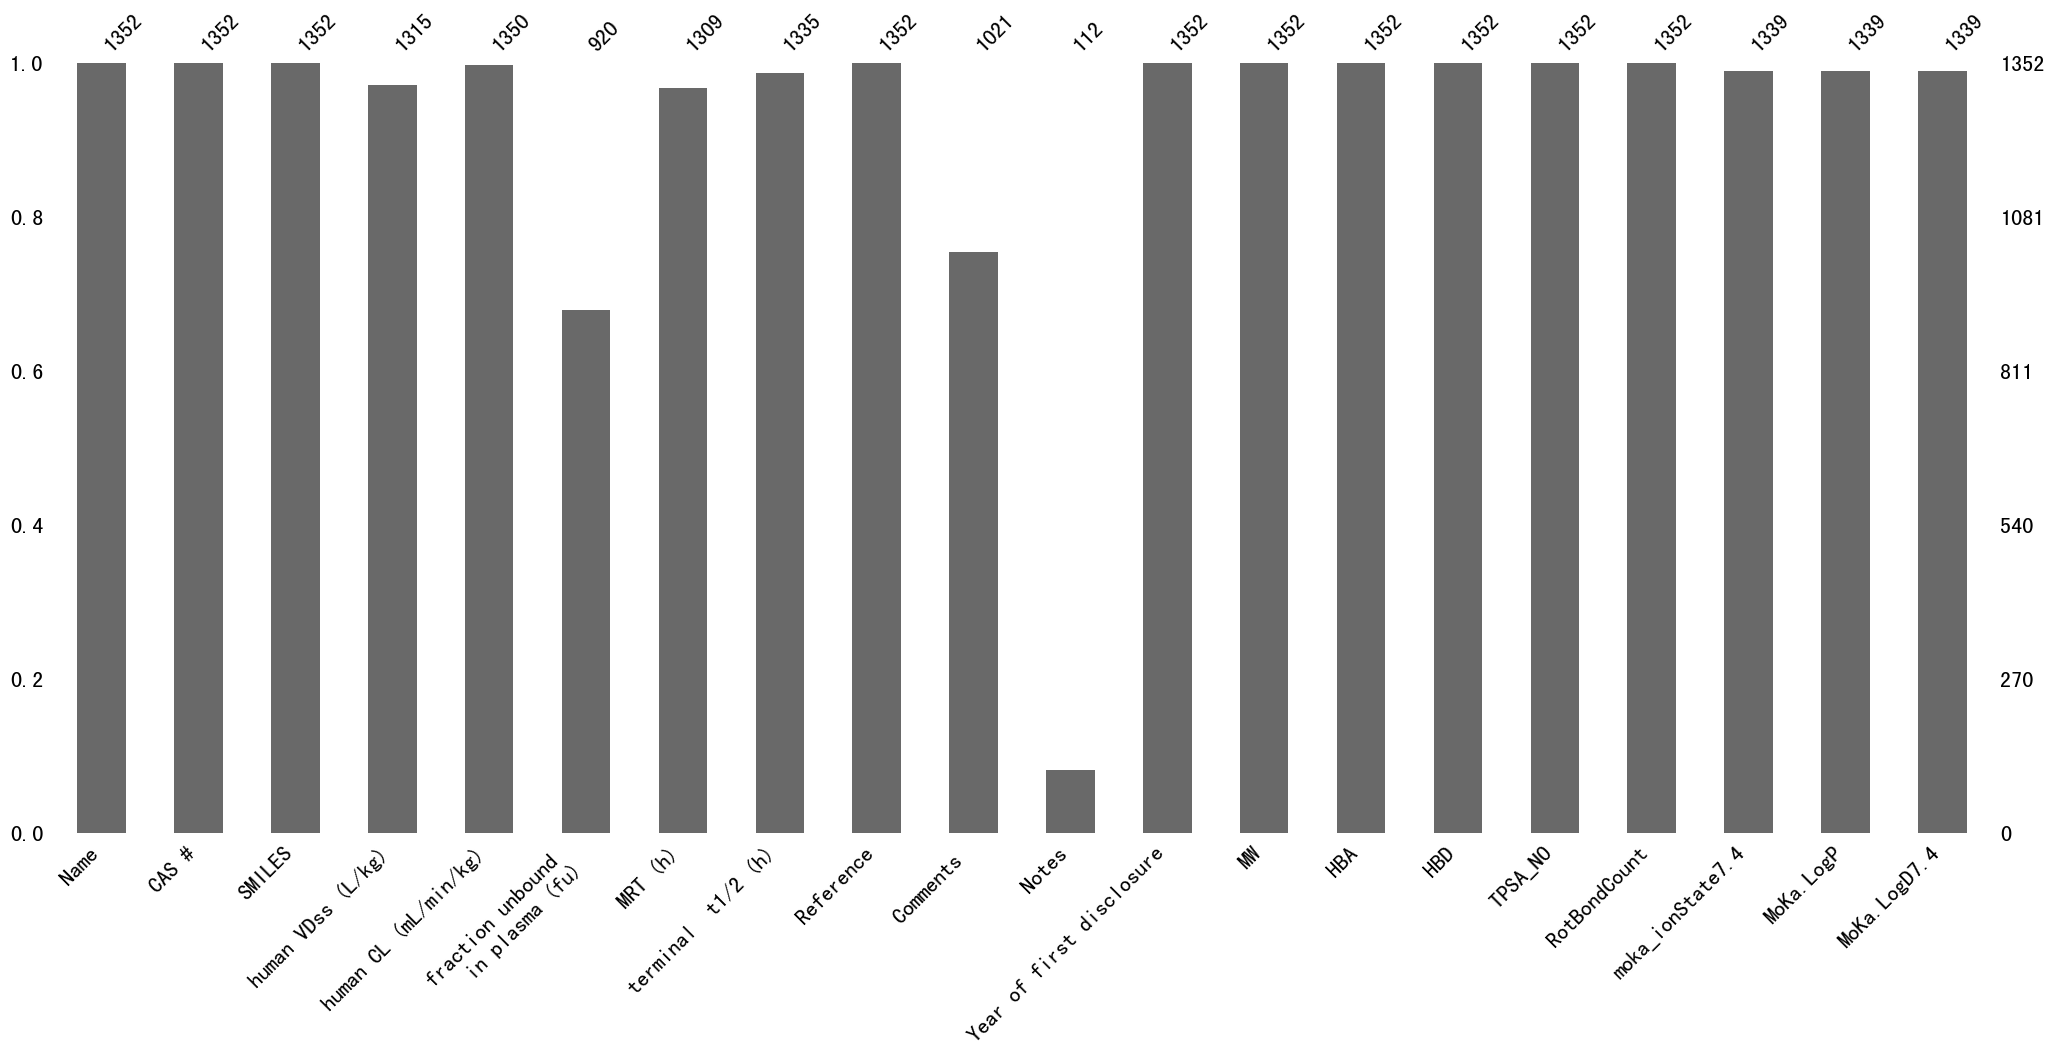

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
missingno.bar(raw_df)

<AxesSubplot: >

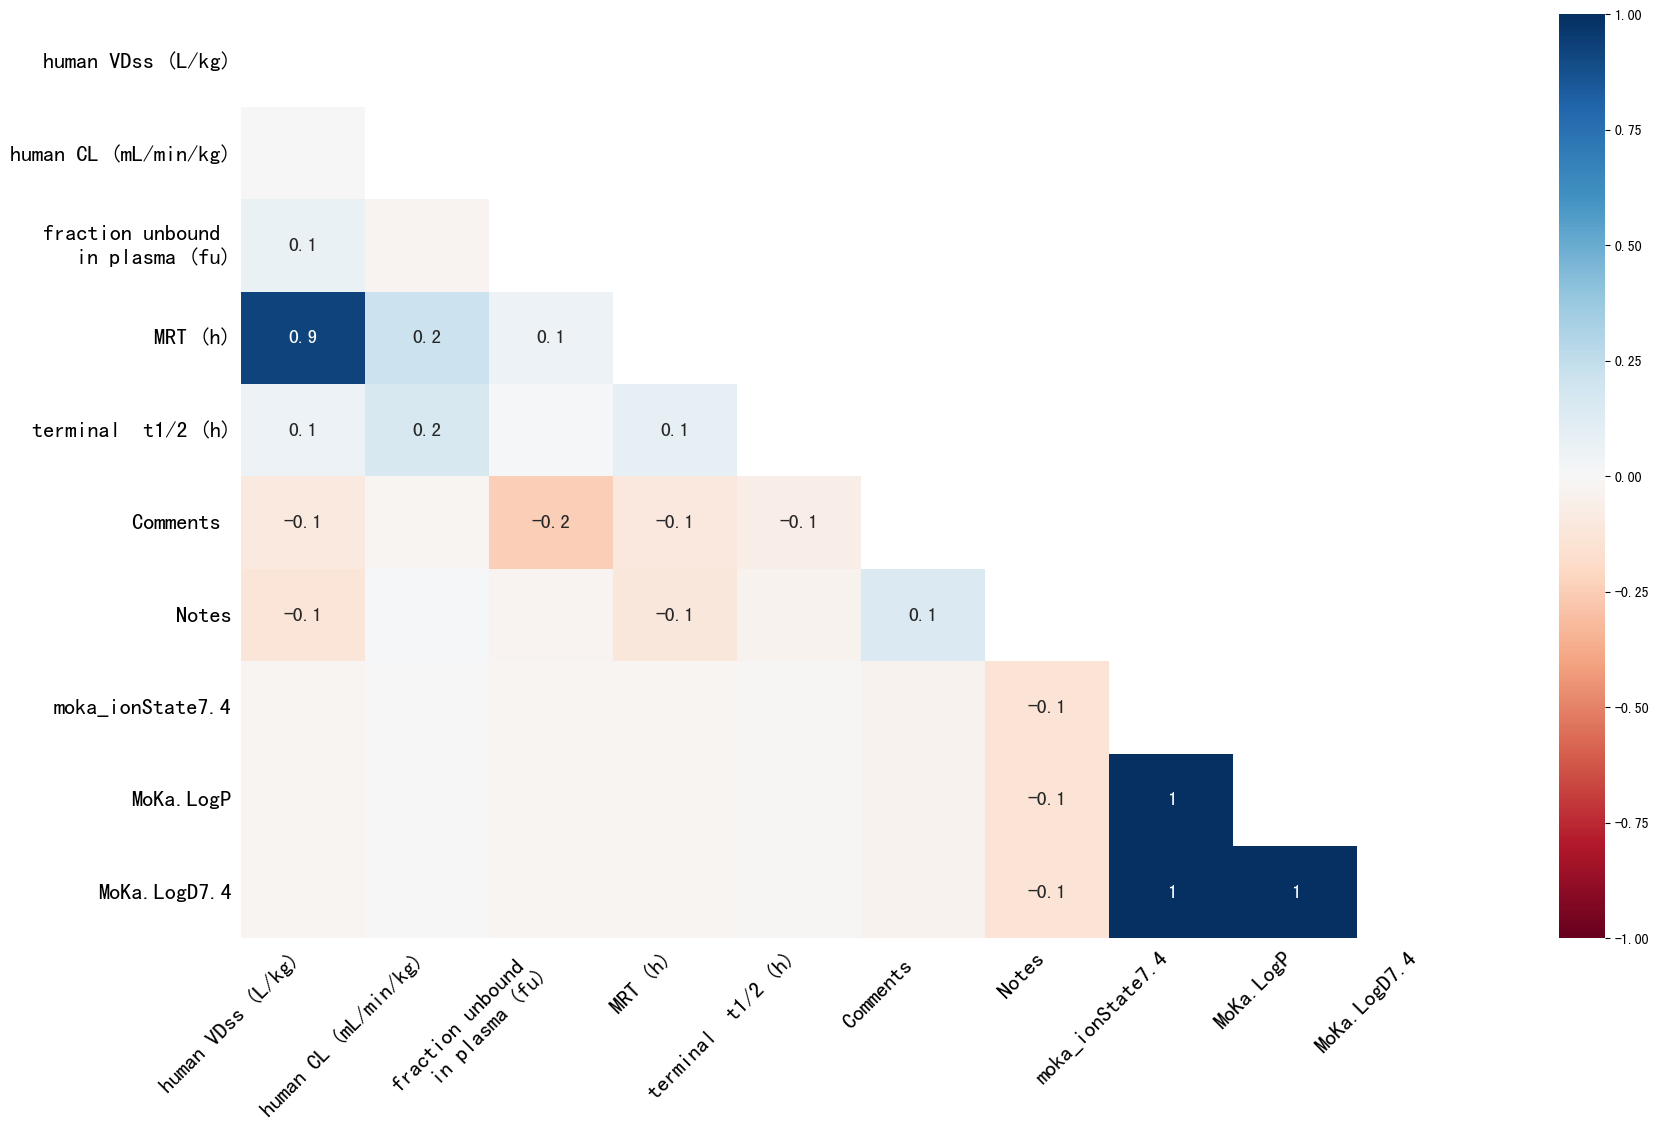

In [13]:
missingno.heatmap(raw_df)

## 重复值

In [15]:
print(raw_df.apply(lambda s: s.duplicated().any()))
raw_df.loc[raw_df.SMILES.duplicated(keep=False), 'duplicated']='duplicated'

Name                                 False
CAS #                                False
SMILES                                True
human VDss (L/kg)                     True
human CL (mL/min/kg)                  True
fraction unbound \nin plasma (fu)     True
MRT (h)                               True
terminal  t1/2 (h)                    True
Reference                             True
Comments                              True
Notes                                 True
Year of first disclosure              True
MW                                    True
HBA                                   True
HBD                                   True
TPSA_NO                               True
RotBondCount                          True
moka_ionState7.4                      True
MoKa.LogP                             True
MoKa.LogD7.4                          True
duplicated                            True
dtype: bool


In [18]:
raw_df.head(10)
compounds =  get_compounds("Ajmaline", 'name')
compounds

[Compound(6100671)]

## 绘制分子图

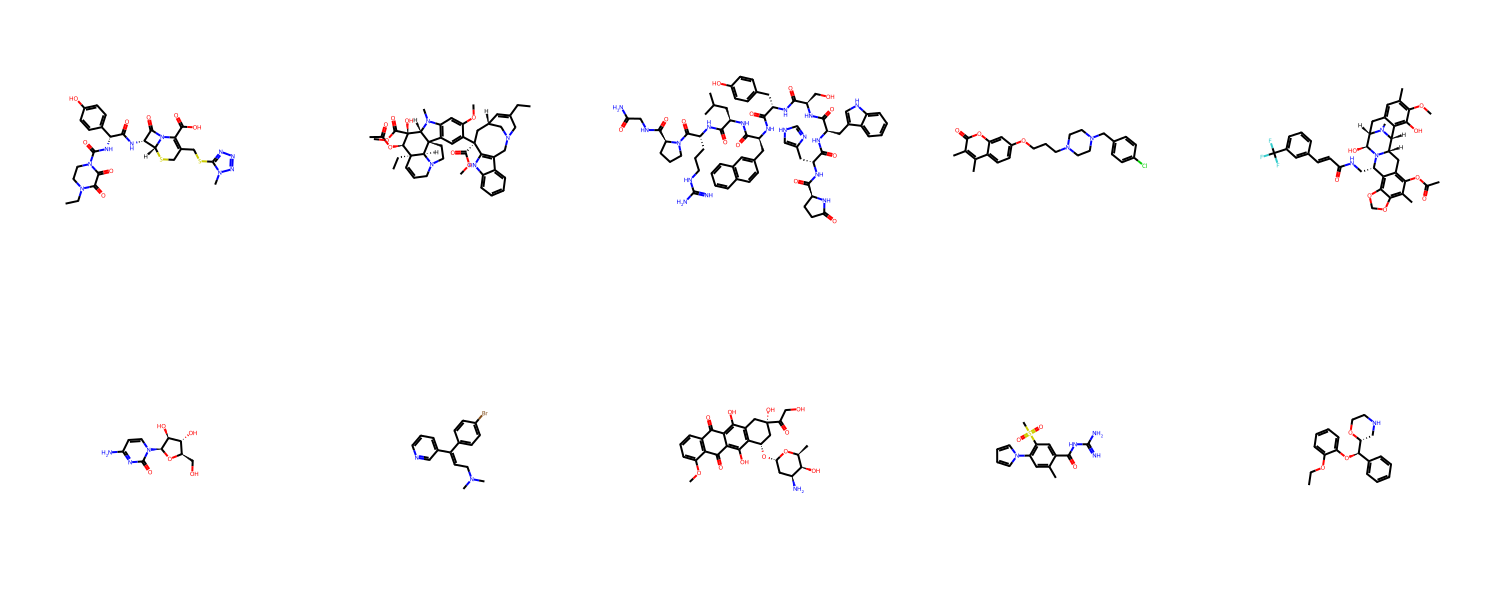

In [16]:
n_batch_inspect = 10
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(sm) for sm in raw_df.SMILES.sample(n_batch_inspect) if is_valid_smiles(sm)], 
    molsPerRow=5, subImgSize=(300, 300)
)

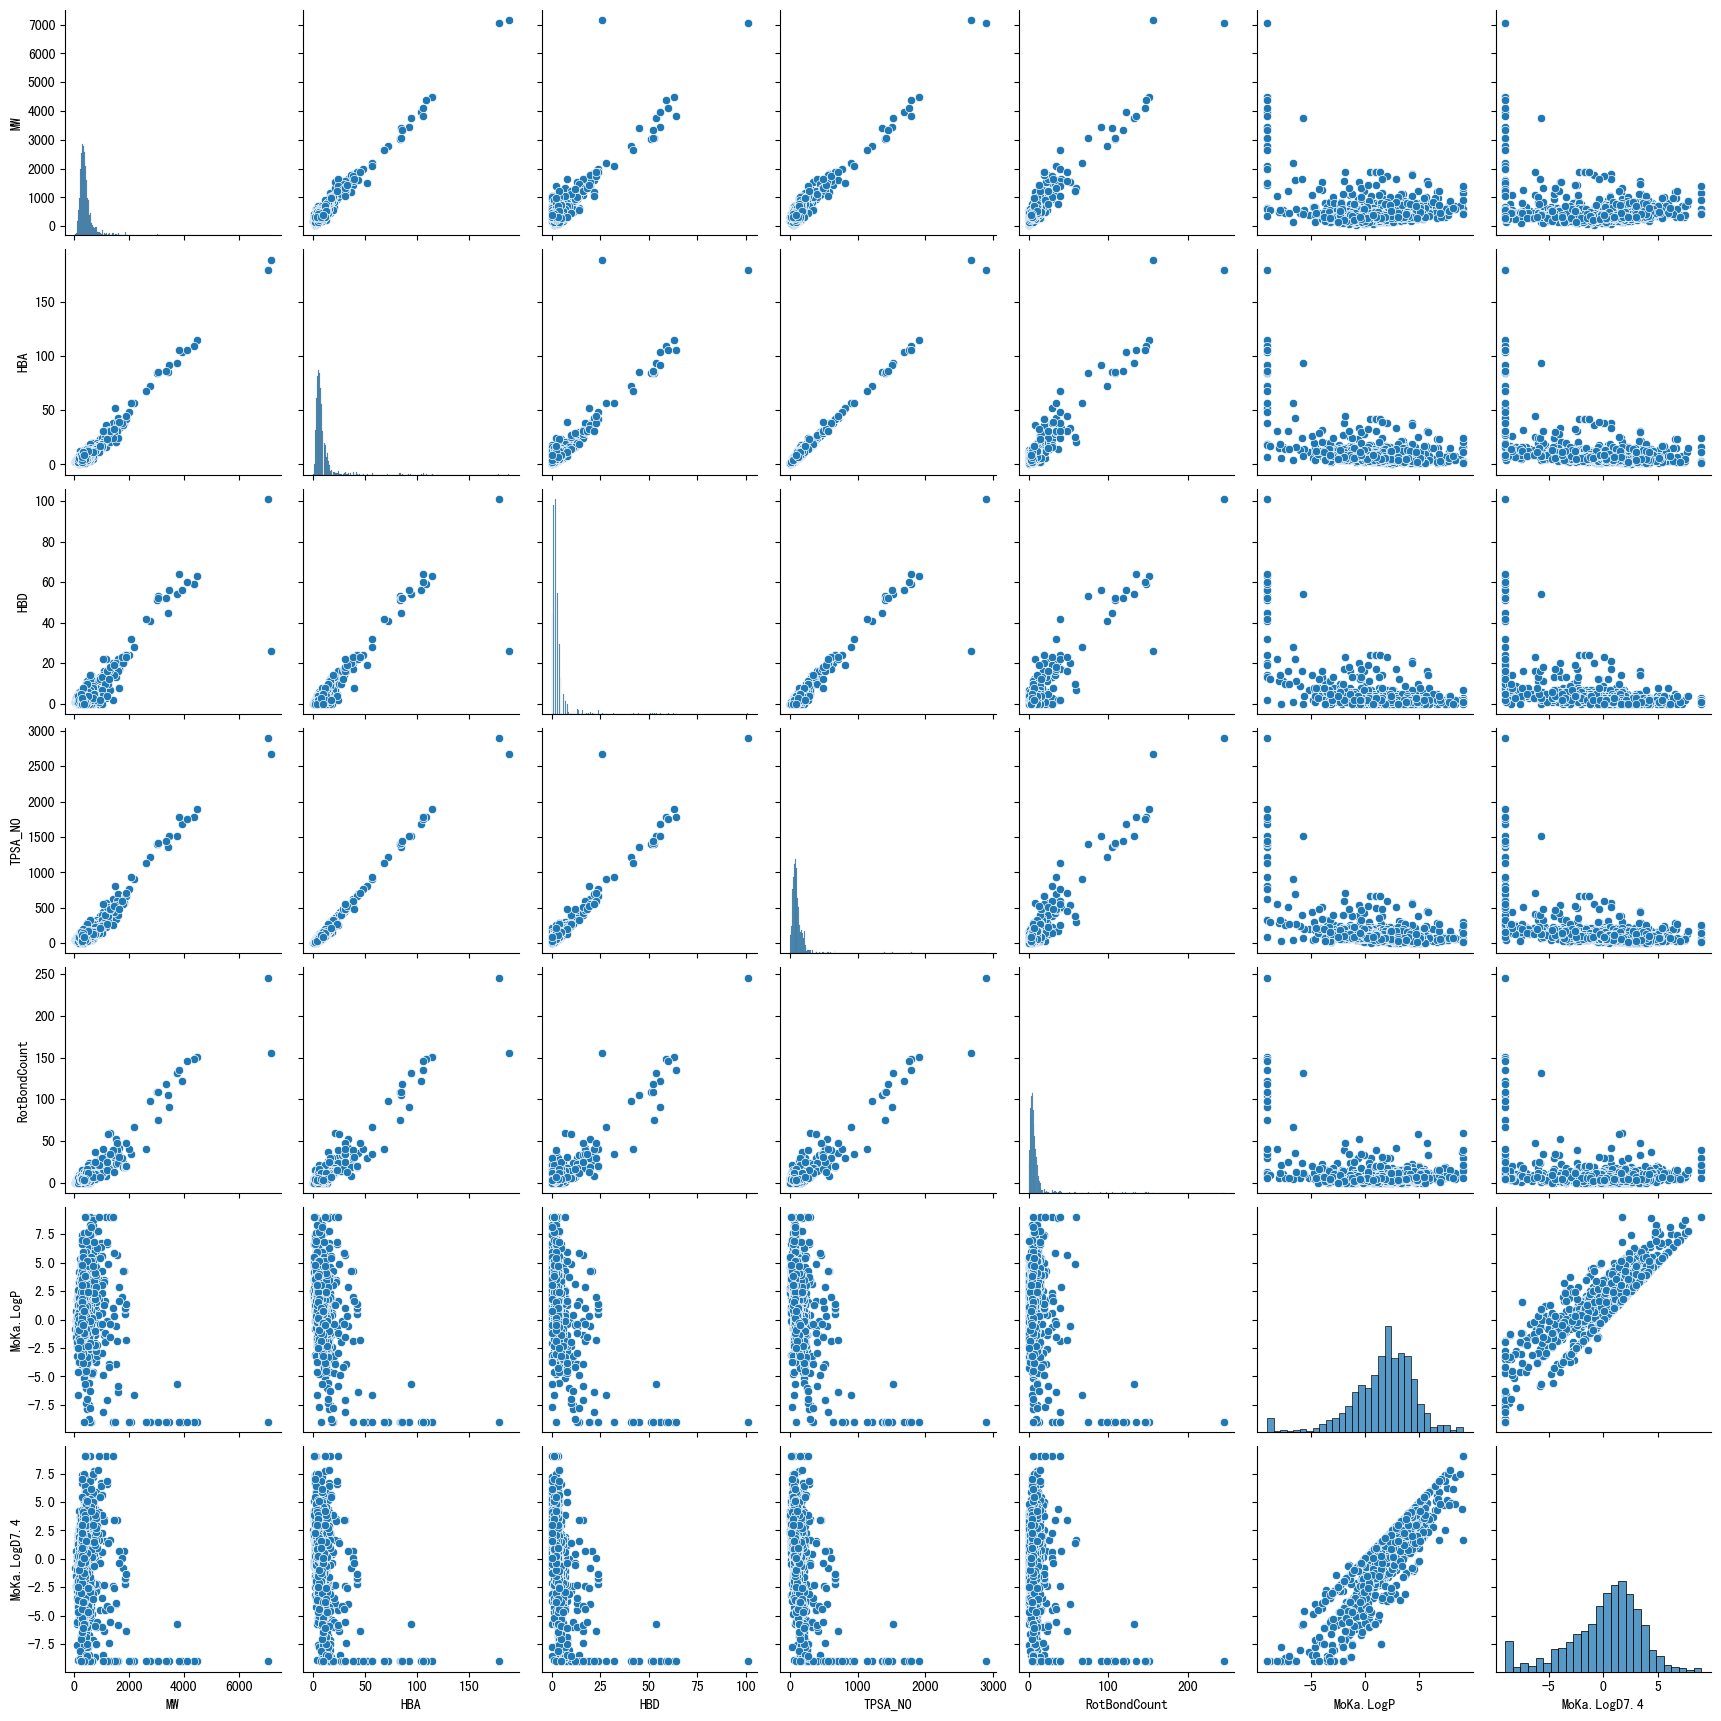

In [20]:
x_cols=['MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4']
df=raw_df
sns.pairplot(df[x_cols])

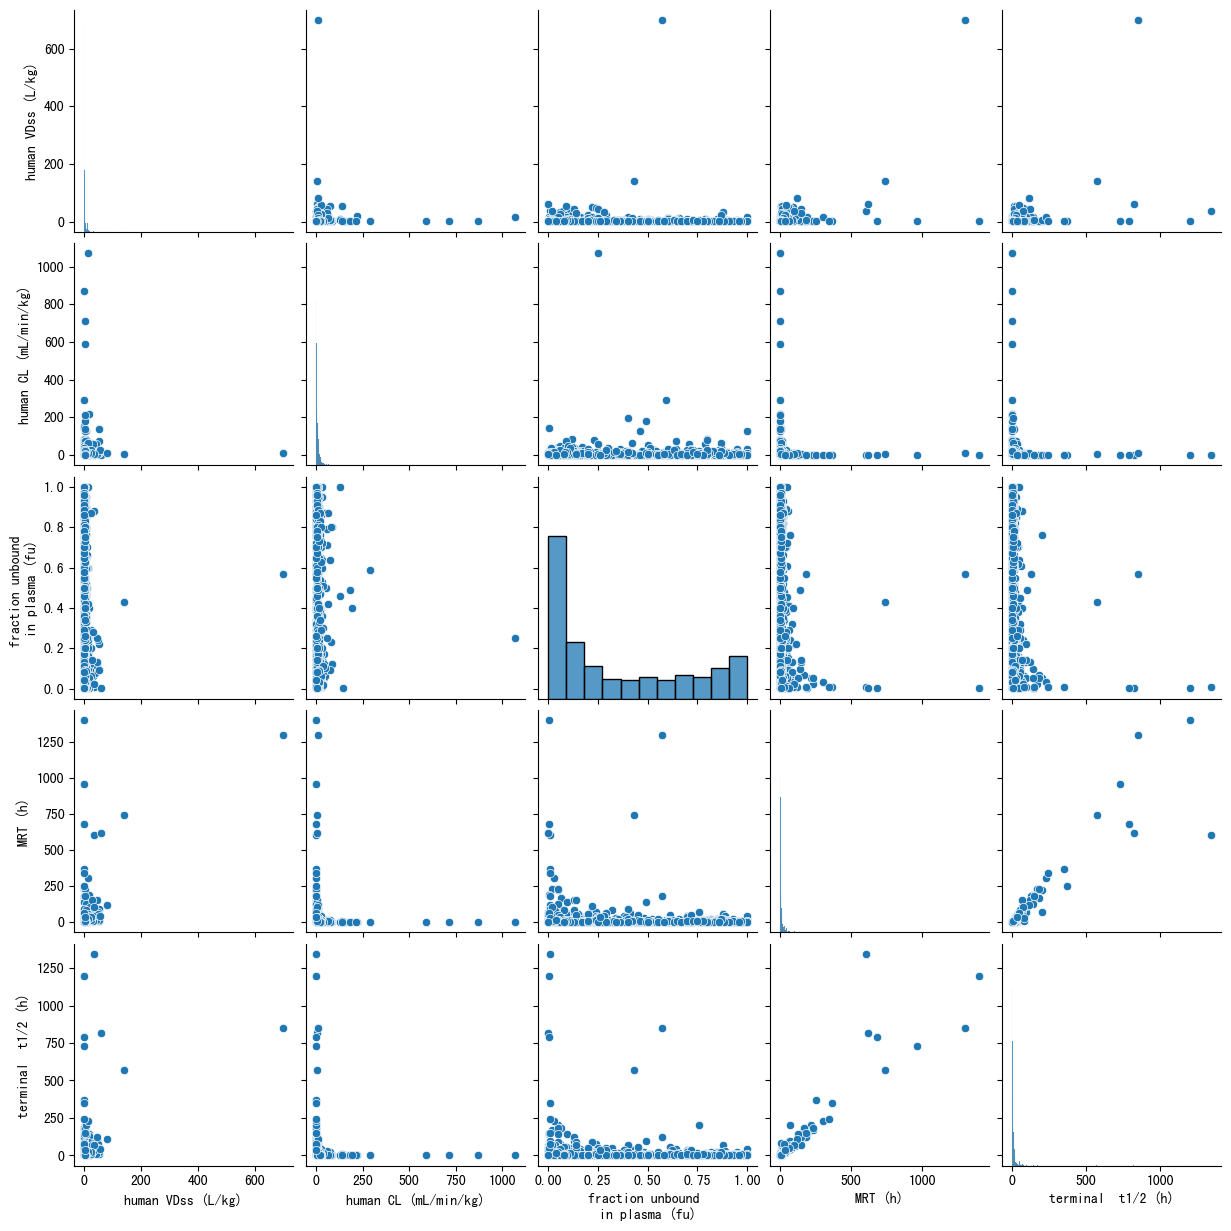

In [22]:
# x_cols=['MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4','human VDss (L/kg)', 'human CL (mL/min/kg)', 'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)']
x_cols=['human VDss (L/kg)', 'human CL (mL/min/kg)', 'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)']
df=raw_df
sns.pairplot(df[x_cols])

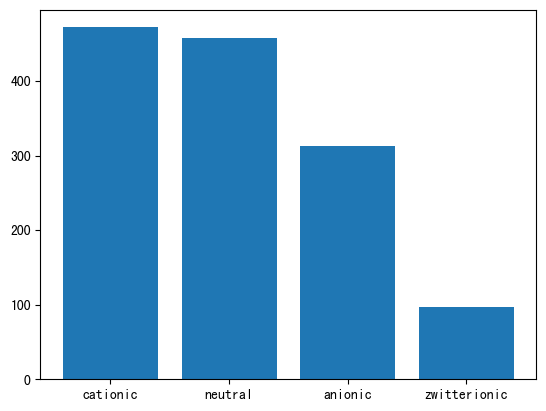

In [23]:
plt.bar(x=df['moka_ionState7.4'].value_counts().index, height=df['moka_ionState7.4'].value_counts())
plt.show()


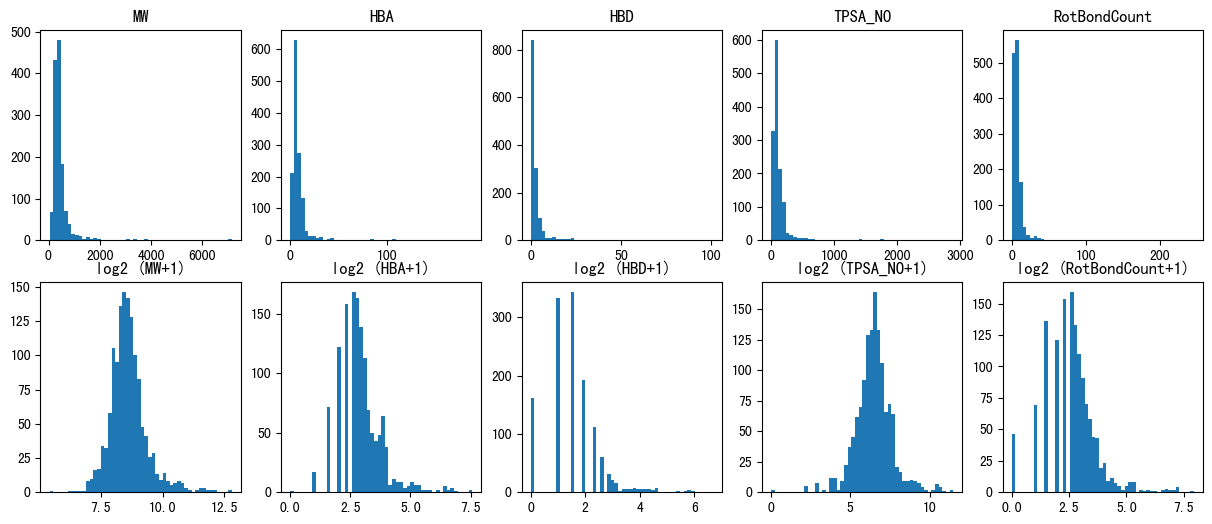

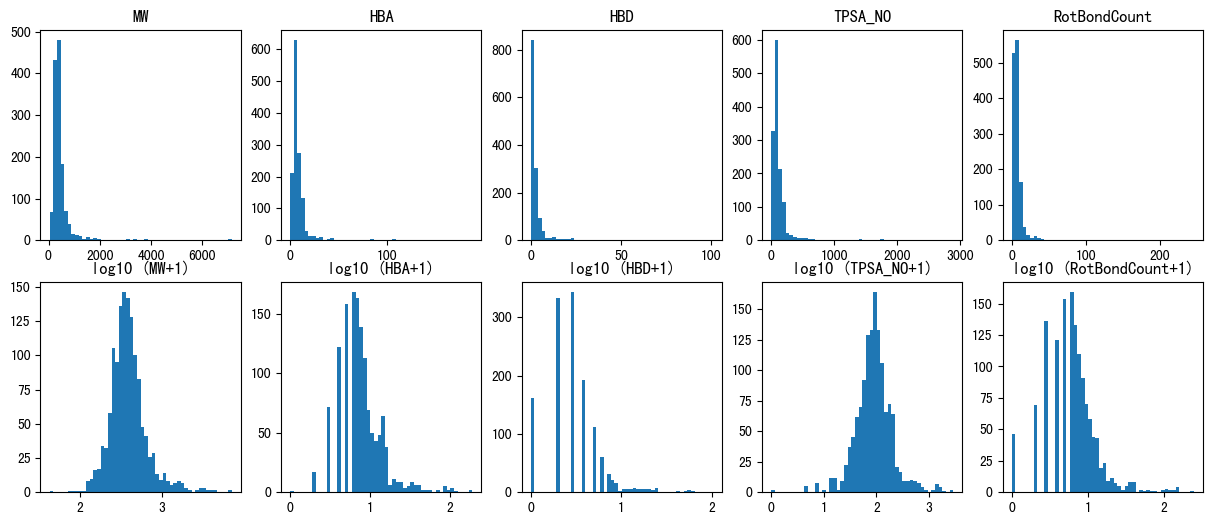

In [26]:
plt.figure(figsize=(15, 6))
x_cols = [
    'MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 
    'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4'
]
for i,colname in enumerate(x_cols[:5]):
    plt.subplot(2, 5, i+1)
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.subplot(2, 5, i+6)
    plt.hist(np.log2(df[colname]+1), bins=50)
    plt.title(f'log2 ({colname}+1)')
plt.figure(figsize=(15, 6))
for i,colname in enumerate(x_cols[:5]):
    plt.subplot(2, 5, i+1)
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.subplot(2, 5, i+6)
    plt.hist(np.log10(df[colname]+1), bins=50)
    plt.title(f'log10 ({colname}+1)')

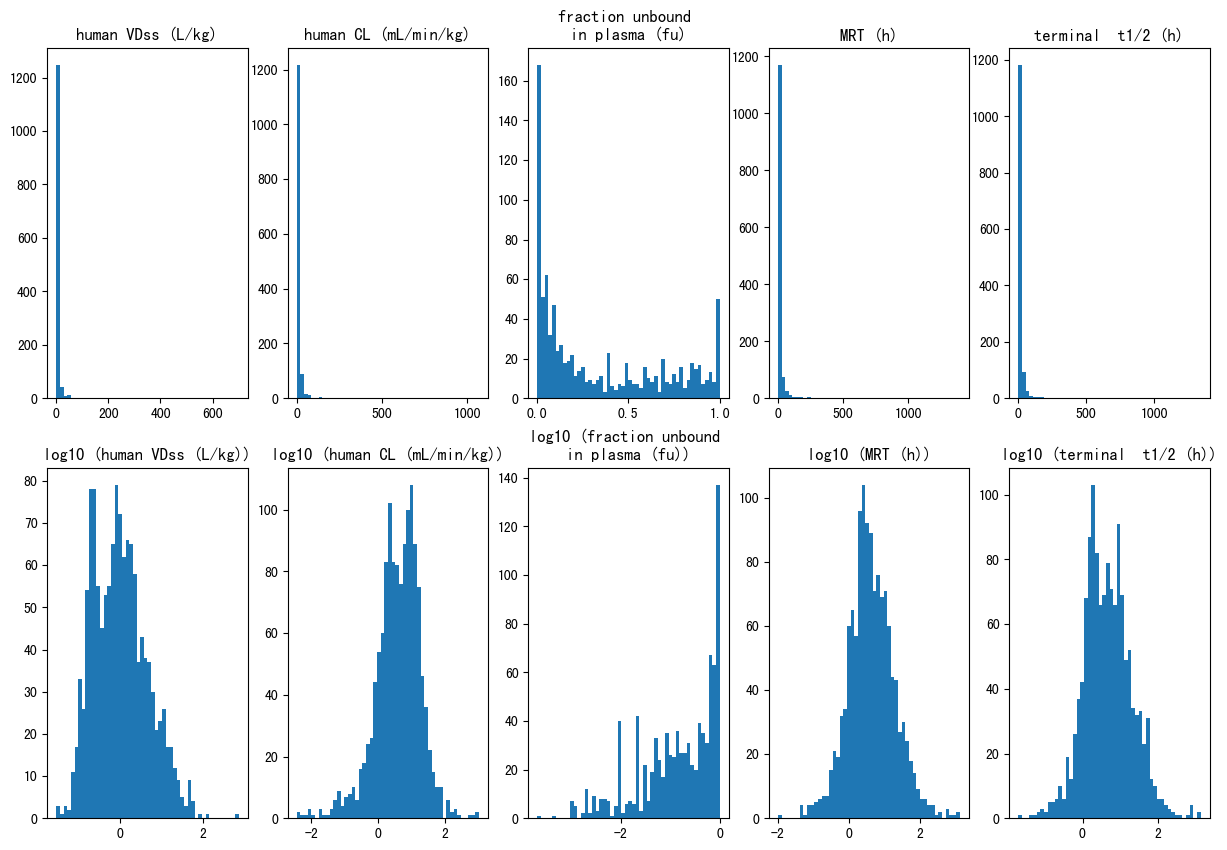

In [29]:
plt.figure(figsize=(15, 10))
y_cols=['human VDss (L/kg)', 'human CL (mL/min/kg)', 'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)']
for i,colname in enumerate(y_cols):
    plt.subplot(2, 5, i+1)
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.subplot(2, 5, i+6)
    plt.hist(np.log10(df[colname]), bins=50)
    plt.title(f'log10 ({colname})')

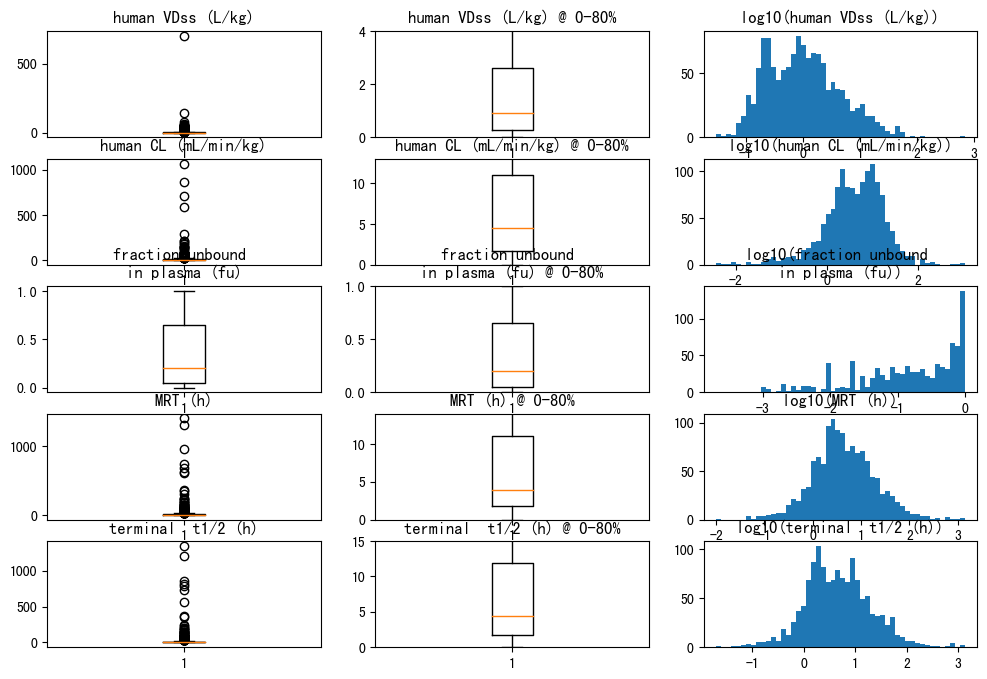

In [33]:
plt.figure(figsize=(12, 8))
y_cols=['human VDss (L/kg)', 'human CL (mL/min/kg)', 'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)']
n_row=len(y_cols)
for i, colname in enumerate(y_cols):
    vals = raw_df[colname].dropna()
    plt.subplot(n_row, 3, i*3+1)
    plt.boxplot(vals)
    plt.title(colname)
    plt.subplot(n_row, 3, i*3+2)
    plt.title(colname)
    plt.boxplot(vals)
    plt.ylim(
        0, 
        round(np.percentile(vals, 80)), 
    )
    plt.title(f"{colname} @ 0-80%")
    plt.subplot(n_row, 3, i*3+3)
    plt.hist(np.log10(vals), bins=50)
    plt.title(f"log10({colname})")
plt.show()

# 数据过滤

## 删除重复值

In [168]:
print(raw_df.apply(lambda s: s.duplicated().any()))
df_duplicated_num=raw_df[raw_df.SMILES.duplicated(keep=False)]
smiles_duplicated_file=dataset_dir+"smiles_duplicated_%s_%s.csv"%(len(df_duplicated_num),date_str)
df_duplicated_num.to_csv(smiles_duplicated_file,index=False)
raw_df=raw_df.loc[~raw_df.SMILES.duplicated(keep=False),]
logger.info("after drop_duplicated record nums:%s drop num:%s"%(raw_df.shape[0],df_duplicated_num.shape[0]))
logger.info(df_duplicated_num)

Name                                 False
CAS #                                False
SMILES                                True
human VDss (L/kg)                     True
human CL (mL/min/kg)                  True
fraction unbound \nin plasma (fu)     True
MRT (h)                               True
terminal  t1/2 (h)                    True
Reference                             True
Comments                              True
Notes                                 True
Year of first disclosure              True
MW                                    True
HBA                                   True
HBD                                   True
TPSA_NO                               True
RotBondCount                          True
moka_ionState7.4                      True
MoKa.LogP                             True
MoKa.LogD7.4                          True
dtype: bool


2023-07-05 10:49:00 | 2048149998.py | MainProcess | MainThread | 2048149998.<cell line: 6>:6 - INFO -after drop_duplicated record nums:1350 drop num:2


## 删除目标值为空

In [169]:
logger.info("tartget记录数:%s"%raw_df.shape[0])
df_target_null=raw_df[raw_df[target_cols].isnull()]
target_null_file=dataset_dir+"target_null_%s_%s.csv"%(len(df_target_null),date_str)
df_target_null.to_csv(target_null_file,index=False)
raw_df.dropna(axis=0,subset=[target_cols],inplace=True)
logger.info("tartget：%s去除空值后记录数:%s"%(target_cols,raw_df.shape[0]))
logger.info(df_target_null)

2023-07-05 10:49:17 | 3421470183.py | MainProcess | MainThread | 3421470183.<cell line: 1>:1 - INFO -tartget记录数:1350
2023-07-05 10:49:17 | 3421470183.py | MainProcess | MainThread | 3421470183.<cell line: 6>:6 - INFO -tartget：human CL (mL/min/kg)去除空值后记录数:1348
2023-07-05 10:49:17 | 3421470183.py | MainProcess | MainThread | 3421470183.<cell line: 7>:7 - INFO -                            Name         CAS #                                                              SMILES  human VDss (L/kg)  human CL (mL/min/kg)  fraction unbound \nin plasma (fu)  MRT (h)  terminal  t1/2 (h)                                                                                                  Reference                                                                                                                                                                                                                                                                                                          Comments  Notes

In [ ]:
[2023-07-05 10:35:51,548] INFO [<timed exec> pk_model <module> (161)]: (1352, 20)
[2023-07-05 10:35:51,549] INFO [data.py pk_model get_pruned_df (479)]: original record nums:1352
[2023-07-05 10:35:51,550] INFO [data.py pk_model get_pruned_df (481)]: after drop_duplicated record nums:1350
[2023-07-05 10:35:51,927] INFO [data.py pk_model get_pruned_df (484)]: after drop_invalid_smiles record nums:1340
[2023-07-05 10:35:51,930] INFO [data.py pk_model get_pruned_df (488)]: after drop_missing_x record nums:1337
[2023-07-05 10:35:51,932] INFO [data.py pk_model get_pruned_df (490)]: after MW<=900 record nums:1257
[2023-07-05 10:35:51,933] INFO [<timed exec> pk_model <module> (164)]: (1257, 20)
[2023-07-05 10:35:51,933] INFO [<timed exec> pk_model <module> (168)]: (1257, 20)

## 生成canonical  smiles，并标准化

In [170]:

ori_col='SMILES'
target_col='SMILES_STANDARD'
raw_df=paral_map(raw_df,ori_col,target_col,chembl_smi_standardizer)
logger.info(raw_df[[ori_col,target_col]].head(3))

logger.info("标准化出错记录数:%s"%raw_df[[target_col]].isnull().sum())
logger.info( raw_df[raw_df['SMILES_STANDARD'].isnull()][['Name','SMILES']])
df_similes_error=raw_df[raw_df['SMILES_STANDARD'].isnull()]
smiles_error_file=dataset_dir+"smiles_error_%s_%s.csv"%(len(df_similes_error),date_str)
df_similes_error.to_csv(smiles_error_file,index=False)
raw_df=raw_df[~raw_df['SMILES_STANDARD'].isnull()]
logger.info("删除smiles标准化失败记录%s条，剩余记录数:%s"%(len(df_similes_error),raw_df.shape[0]))
                   
# 并行代码耗时 0.7

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


2023-07-05 10:49:21 | data_util.py | ForkPoolWorker-460 | MainThread | data_util.chembl_smi_standardizer:45 - ERROR -Could not standardize_mol smiles:N[Pt+2]1(N)[O-]C(=O)C2(CCC2)C(=O)[O-]1 erro:'NoneType' object has no attribute 'GetAtoms' 
2023-07-05 10:49:21 | data_util.py | ForkPoolWorker-462 | MainThread | data_util.chembl_smi_standardizer:45 - ERROR -Could not standardize_mol smiles:[N]1(CC(=O)[O-])([Gd+3]2[N@@](CC1)(CC[N@@]2([C@@H](C([O-])=O)COCc1ccccc1)CC(=O)[O-])CC([O-])=O)CC(=O)[O-] erro:'NoneType' object has no attribute 'GetAtoms' 
2023-07-05 10:49:21 | data_util.py | ForkPoolWorker-462 | MainThread | data_util.chembl_smi_standardizer:45 - ERROR -Could not standardize_mol smiles:[Gd+3]1234567OC([C@@H](CO)[N]81CC[N]4(CC[N]3(CC[N]2(CC8)CC(=O)[O-]6)CC(=O)[O-]5)CC(=O)[O-]7)CO erro:'NoneType' object has no attribute 'GetAtoms' 
2023-07-05 10:49:21 | data_util.py | ForkPoolWorker-462 | MainThread | data_util.chembl_smi_standardizer:45 - ERROR -Could not standardize_mol smiles:CNC1

并行代码耗时 0.605771 s


2023-07-05 10:49:21 | 2420513375.py | MainProcess | MainThread | 2420513375.<cell line: 12>:12 - INFO -删除smiles标准化失败记录10条，剩余记录数:1338


## 条件筛选，如分子量等

In [174]:
if exp_name=="cl":
    raw_df=raw_df[raw_df.MW<=900]
    logger.info("删除smiles分子量小于900，记录%s条，剩余记录数:%s"%(raw_df[raw_df.MW>900].shape[0],raw_df.shape[0]))
   #  x_cols = [
   # 'Name', 'MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 
   #  'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4']
   #  df_col_null=raw_df[raw_df[x_cols].isnull().any(axis=1)]
   #  col_null_file=dataset_dir+"col_null_%s_%s.csv"%(len(df_target_null),date_str)
   #  df_col_null.to_csv(col_null_file,index=False)
   #  raw_df = raw_df.dropna(axis='index', subset=x_cols)
   #  logger.info("删除x_cols字段为空，剩余记录数:%s"%(raw_df.shape[0]))
   #  logger.info(df_col_null)

2023-07-05 10:50:14 | 2119995232.py | MainProcess | MainThread | 2119995232.<cell line: 1>:3 - INFO -删除smiles分子量小于900，记录0条，剩余记录数:1255


In [172]:
len(df_col_null)

1

In [173]:
df_col_null

,Name,CAS #,SMILES,human VDss (L/kg),human CL (mL/min/kg),fraction unbound \nin plasma (fu),MRT (h),terminal t1/2 (h),Reference,Comments,Notes,Year of first disclosure,MW,HBA,HBD,TPSA_NO,RotBondCount,moka_ionState7.4,MoKa.LogP,MoKa.LogD7.4,SMILES_STANDARD
858,Nedaplatin,95734-82-0,O1[Pt](OC(=O)C1)(N),0.67,4.05,0.84,2.75,2.1,"Niioka T, Uno T, Yasui-Furukori N, Takahata T, Shimizu M, Sugawara K, Tateishi T. Pharmacokinetics of low-dose nedaplatin and validation of AUC prediction in patients with non-small-cell lung carcinoma. Cancer Chemother Pharmacol (2007) ppb: Yasutsuna Sasaki, Tomohide Tamura, Kenji Eguchi Tetsu Shinkai, Yasuhiro Fujiwara, Masaaki Fukuda, Yuichiro Ohe, Masami Bungo, Naoya Horichi, Shigeki Niimi, Koichi Minato , Kazuhiko Nakagawa and Nagahiro Saijo. Pharmacokinetics of (glycolato-0,0')-diammine platinum(II),a new platinum derivative, in comparison with cisplatin and carboplatin. Cancer Chemother Pharmacol (1989)23:243-246.","57.2 kg average weight, N=19, VDss calculated from reported Vc and k12/k21. MRT from VDss and clearance.","Administered as infusion at 20 mg/m2, in 1 hr. 1 hr after administration paclitaxel (30 mg/m2) was administered. 30' prior to initial infusion dexamethasone (iv, 20 mg), diphenhydramine, (50 mg po) and ranitidine (50 mg iv) were administered to all patients to manage hypersensitivity.",1984,285.14,4,1,61.5,0,NaN,NaN,NaN,N[Pt]1OCC(=O)O1


2023-07-05 10:02:54 | 2109488447.py | MainProcess | MainThread | 2109488447.<cell line: 1>:1 - INFO -195                                                                                       N[Pt+2]1(N)[O-]C(=O)C2(CCC2)C(=O)[O-]1
547                    [N]1(CC(=O)[O-])([Gd+3]2[N@@](CC1)(CC[N@@]2([C@@H](C([O-])=O)COCc1ccccc1)CC(=O)[O-])CC([O-])=O)CC(=O)[O-]
548                               [Gd+3]1234567OC([C@@H](CO)[N]81CC[N]4(CC[N]3(CC[N]2(CC8)CC(=O)[O-]6)CC(=O)[O-]5)CC(=O)[O-]7)CO
549                                              CNC1=O[Gd+3]234567N(CCN2(C1)CC(=O)[O-]3)(CCN4(CC(=O5)NC)CC(=O)[O-]6)CC(=O)[O-]7
550     C(C([N+]([Gd+++]([N+]1(C2)C3)([N+](C2)(C2)C4)([O-]5)([O-]6)([O-]C3=O)([O-]C4=O)[O-]C2=O)(CC6=O)CC5=O)C1)C(=CC=C1OCC)C=C1
551                                      O=C1C[N]23CC[N]45CC(=O)[O-][Gd+3]2424([O-]1)([O-]C(=O)C5)[O-]C(=O)C[N]2(CC3)CC(=O)[O-]4
552                                      [N]123CC[N]45CC[N]67CC[N]8(CC1)CC(=O)[O-][Gd+3]3578([OH]C(C2)C)([O-]C(=O)C4)[O-]C(=O

## 生成LOG TARGET值

In [ ]:


# target="VDss(L/kg)"
# def logY(x):
#     return np.log10(x)

# 并行代码耗时 0.7

In [176]:

# raw_df[["%s_log2"%target]] = np.log2(raw_df[["Y"]])
# raw_df[["%s_log10"%target]] = np.log10(raw_df[["Y"]])
target=target_cols
ori_col=target
target_col="%s_log10"%target
raw_df=paral_map(raw_df,
                 ori_col,target_col,np.log10)


print(raw_df[[ori_col,target_col]].head(5))
target_col="%s_log2"%target
raw_df=paral_map(raw_df,
                 ori_col,target_col,np.log10)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


并行代码耗时 0.253255 s
   human CL (mL/min/kg)  human CL (mL/min/kg)_log10
1                  3.00                    0.477121
2                  3.90                    0.591065
3                  8.70                    0.939519
4                  0.18                   -0.744727
5                  1.50                    0.176091
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


并行代码耗时 0.235052 s


# 数据集检查

## pubchemy 查询校验 SMILES和名称

### cid值

In [177]:
print(raw_df[[ori_col,target_col]].head(1000))

      human CL (mL/min/kg)  human CL (mL/min/kg)_log2
1                     3.00                   0.477121
2                     3.90                   0.591065
3                     8.70                   0.939519
4                     0.18                  -0.744727
5                     1.50                   0.176091
...                    ...                        ...
1063                  1.05                   0.021189
1064                  2.40                   0.380211
1065                  3.50                   0.544068
1066                  1.51                   0.178977
1067                  7.10                   0.851258

[1000 rows x 2 columns]


In [178]:
null_count = raw_df[target_col].isnull().sum()

# 统计空值占比
null_ratio = null_count / len(raw_df[target_col])

print("空值数量：", null_count)
print("空值占比：", null_ratio)
# 并行代码耗时 0.7


空值数量： 0
空值占比： 0.0


In [180]:
ori_col=chemical_name_cols
ori_target_col=cas_no_cols
target_col='CAS_number'
# cas_no_cols='CAS #'  'CAS_number'
# chemical_name_cols='Name'

raw_df=paral_map(raw_df,ori_col,target_col,query_compound)
print(raw_df[[ori_col,ori_target_col,target_col]].head(3))

null_count = raw_df[target_col].isnull().sum()
# 统计空值占比
null_ratio = null_count / len(raw_df[target_col])
print("空值数量：", null_count)
print("空值占比：", null_ratio)
# 并行代码耗时 0.7

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


2023-07-05 11:00:52 | <timed exec> | ForkPoolWorker-496 | MainThread | <timed exec>.query_compound:242 - ERROR -cas_name：Carfilzomib没有查询到cid
2023-07-05 11:01:07 | <timed exec> | ForkPoolWorker-500 | MainThread | <timed exec>.query_compound:242 - ERROR -cas_name：Nizatidine没有查询到cid
2023-07-05 11:03:12 | <timed exec> | ForkPoolWorker-497 | MainThread | <timed exec>.query_compound:242 - ERROR -cas_name：Eltoprazine没有查询到cid
2023-07-05 11:03:58 | <timed exec> | ForkPoolWorker-498 | MainThread | <timed exec>.query_compound:242 - ERROR -cas_name：Ilaprazole没有查询到cid
2023-07-05 11:03:58 | <timed exec> | ForkPoolWorker-502 | MainThread | <timed exec>.query_compound:242 - ERROR -cas_name：Vincristine没有查询到cid
2023-07-05 11:04:24 | <timed exec> | ForkPoolWorker-501 | MainThread | <timed exec>.query_compound:242 - ERROR -cas_name：Sulfisoxazole没有查询到cid


并行代码耗时 314.997379 s
       Name  CAS #  CAS_number
1   (-)dOTC    NaN         NaN
2   (+)dOTC    NaN         NaN
3  1,3-DCQA    NaN         NaN
空值数量： 63
空值占比： 0.050199203187251


### smiles核对

In [60]:
smiles_column="SMILES"
cas_col="CAS_number"
name_col='chemical_name'
raw_df=get_smiles(raw_df,smiles_column,cas_col="CAS #",name_col="Name")
show_cols=[smiles_column,"smiles_supplementary",cas_col,name_col]
print(raw_df[show_cols].head(5))

                                                                                                     SMILES                                                                                      smiles_supplementary   CAS_number                chemical_name
0                                                                   CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C                                                                   CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C  207679-81-0  5-Hydroxymethyl tolterodine
1                                                   O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs1)c1cccs1                                                   O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs1)c1cccs1  320345-99-1           Aclidinium bromide
2                                    CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@@H](C2[C@H]5O)N3[C@@H]1O                                    CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@@H](C2[C@H]5O)N3[C@@H]1O    4360-12-7      

In [61]:
#SMILES 不同列
is_same = raw_df['SMILES'] == raw_df['smiles_supplementary']
# 定位不同的行
diff_rows = raw_df.loc[~is_same]
# 输出结果
print(diff_rows)

Empty DataFrame
Columns: [chemical_name, CAS_number, VDss(L/kg), SD, fu_h, reference_number, Comments_1, Comments_2, t_1/2, SMILES, InChI, MW, logP, logVDss, SMILES_STANDARD, cid, smiles_supplementary]
Index: []


In [55]:
print(raw_df[show_cols].head(50))

                                                                                                      SMILES                                                                                      smiles_supplementary    CAS_number                chemical_name
0                                                                    CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C                                                                   CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C   207679-81-0  5-Hydroxymethyl tolterodine
1                                                    O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs1)c1cccs1                                                   O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs1)c1cccs1   320345-99-1           Aclidinium bromide
2                                     CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@@H](C2[C@H]5O)N3[C@@H]1O                                    CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@@H](C2[C@H]5O)N3[C@@H]1O     4360-12

In [ ]:
dataset_name='vdss/VDss_dataset.xlsx'
vdss_data = pd.read_excel(dataset_dir+dataset_name)
cas_no_cols='CAS_number'
chemical_name_cols='chemical_name'

## SMILES 重复值

In [36]:
raw_df_duplicated = raw_df.loc[raw_df.SMILES.duplicated(keep=False), ]
print(raw_df_duplicated.shape)
print(raw_df_duplicated.head(10))

(2, 21)
             Name        CAS #                                                                                                                    SMILES  human VDss (L/kg)  human CL (mL/min/kg)  fraction unbound \nin plasma (fu)  MRT (h)  terminal  t1/2 (h)                                                                         Reference                                                                           Comments                                                                              Notes  Year of first disclosure      MW  HBA  HBD  TPSA_NO  RotBondCount moka_ionState7.4  MoKa.LogP  MoKa.LogD7.4  duplicated
550  Gadofosveset  742680-48-4  C(C([N+]([Gd+++]([N+]1(C2)C3)([N+](C2)(C2)C4)([O-]5)([O-]6)([O-]C3=O)([O-]C4=O)[O-]C2=O)(CC6=O)CC5=O)C1)C(=CC=C1OCC)C=C1               0.15                  0.10                               0.16     22.7               16.30  PDR Accessed on March 15 2013. http://www.pdr3d.com/detail.php?c=7685#section-13                          

In [37]:
logger.info("SMILES去重前记录数:%s"%raw_df.shape[0])
raw_df = raw_df.loc[~raw_df['SMILES'].duplicated(keep=False), ]
logger.info("SMILES去重后记录数:%s"%raw_df.shape[0])

2023-07-05 09:29:21 | 3684624252.py | MainProcess | MainThread | 3684624252.<cell line: 1>:1 - INFO -SMILES去重前记录数:1352
2023-07-05 09:29:21 | 3684624252.py | MainProcess | MainThread | 3684624252.<cell line: 3>:3 - INFO -SMILES去重后记录数:1350


## 和测试集等的交集

In [70]:
test_set_file="/data/project/pbpk/data/test/drug_test_dataset_40_v1.csv"
df_test=pd.read_csv(test_set_file)
print(df_test.columns)
print(df_test.shape)

Index(['Unnamed: 0', 'Name', 'Caco-2(10-6 cm/s)_exp', 'SMILES', 'Reference', 'Year of first disclosure', 'human CL (mL/min/kg)', 'fup_Human', 'terminal  t1/2 (h)', 'human VDss (L/kg)', 'MW', 'MW.1', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'moka_ionState7.4.1', 'in vivo CL_(L/hr/kg)_Human', 'Caco-2(10-6 cm/s)_data', 'caco2_log2', 'fup_log2', 'cl_log2', 'caco2_log10', 'fup_log10', 'cl_log10', 'vdss_log10', 'SMILES_STANDARD'], dtype='object')
(40, 29)


In [73]:
intersection = pd.merge(raw_df, df_test, on='SMILES_STANDARD')
# difference = pd.concat([df_admet_caco2_ref,df_caco2_test]).drop_duplicates(keep=False)
# print(intersection)
print(raw_df.shape)
print(df_test.shape)
print(intersection.shape)
print(intersection['SMILES_STANDARD'].value_counts())

(2440, 19)
(40, 29)
(34, 47)
CC(=O)Nc1ccc(O)cc1                                                                         1
CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12                             1
CC(C)(C)NCC(O)COc1cccc2c1CC(O)C(O)C2                                                       1
COC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1ccccc1[N+](=O)[O-]                                       1
Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O                                                          1
COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC                                              1
CC(C)NCC(O)COc1cccc2ccccc12                                                                1
CN/C(=C\[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1                                                  1
Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1Cl)=NC2                                                    1
Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NC2                                                      1
COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)

## 保存训练集，提出和测试集重复数据

In [ ]:

# dataset_name='VDss_dataset.xlsx'
df_train_exclude_test,df_train_same_test=get_exclude_train(raw_df,df_test)
result_save_file=dataset_dir+"%s_dataset.csv"%exp_name
file_name=result_save_file.replace(".csv","_%s.csv"%df_train_exclude_test.shape[0])
df_train_exclude_test.to_csv(file_name,index=False)
result_save_file=dataset_dir+"bak/%s_dataset.csv"%exp_name #保存备份
bak_file_name=result_save_file.replace(".csv","_%s_%s.csv"%(df_train_exclude_test.shape[0]),data_str)
df_train_exclude_test.to_csv(bak_file_name,index=False)
logger.info("save_cols:%s"%save_cols)
logger.info("数据保存为:%s"%file_name)

## 目标值统计

2023-07-03 17:03:48 | 818772780.py | MainProcess | MainThread | 818772780.<cell line: 1>:1 - INFO -tartget记录数:2440
2023-07-03 17:03:48 | 818772780.py | MainProcess | MainThread | 818772780.<cell line: 3>:3 - INFO -tartget：VDss(L/kg)去处空值后记录数:2440


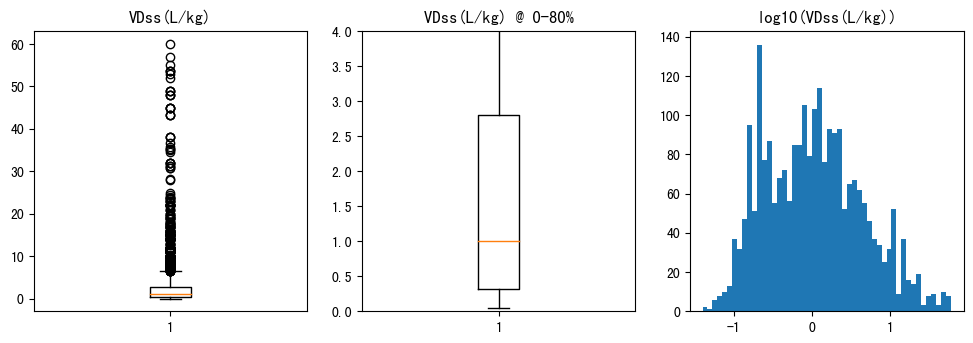

In [68]:
plt.figure(figsize=(12, 8))
y_df=raw_df

for i, colname in enumerate([target_cols]):
    vals = y_df[colname].dropna()
    plt.subplot(2, 3, i*3+1)
    plt.boxplot(vals)
    plt.title(colname)
    plt.subplot(2, 3, i*3+2)
    plt.title(colname)
    plt.boxplot(vals)
    plt.ylim(
        0, 
        round(np.percentile(vals, 80))
    )
    plt.title(f"{colname} @ 0-80%")
    plt.subplot(2, 3, i*3+3)
    # print(vals.isnull().sum())
    # plt.hist((vals), bins=50)
    # plt.hist( (np.isfinite(vals)), bins=100)
    # plt.hist(np.log10(np.isfinite(vals)), bins=50)
    plt.hist(np.log10(abs(vals)), bins=50)
    # dataf = pd.DataFrame(np.log(vals))
    # plt.hist(y_df[np.isfinite(y_df['LABEL'])].values)
    # plt.hist(dataf[np.isfinite(dataf)].values, bins = 100)
    plt.title(f"log10({colname})")
plt.show()

## 分布异常

In [ ]:
check_cols=['HBA', 'HBD', 'RotBondCount']
for colname in  check_cols:
    print(f"{colname} upper-bound: {np.percentile(df[colname], 90) + 1}")

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


并行代码耗时 0.816212 s


In [ ]:
plt.figure(figsize=(12, 4))
for i, colname in enumerate(check_cols):
    plt.subplot(1, 3, i+1)
    upper_bound = np.percentile(df[colname], 90) + 1
    plt.title(f"{colname} clipped at {upper_bound}")
    plt.hist(df[colname].apply(lambda ele: ele if ele < upper_bound else upper_bound))

In [75]:
# # 数据检查
# # SMILES重复值检查和提出

# raw_df.apply(lambda s: s.duplicated().any())
# raw_df.loc[raw_df.SMILES.duplicated(keep=False), 'duplicated']='duplicated'
# raw_df.loc[~raw_df.SMILES.apply(is_valid_smiles),'sanitizemol']="Explicit valence for atom , is greater than permitted"
# raw_df.columns
# raw_df.to_excel('tmp/pk_data2023.xlsx',index=False)
# logger.info("SMILES重复记录数:%s"%len(raw_df.loc[raw_df.SMILES.duplicated(keep=False), ]))
# logger.info("重复记录:%s"%raw_df.loc[raw_df.SMILES.duplicated(keep=False), ])
# df_no_duplicated = raw_df.loc[~raw_df.SMILES.duplicated(keep=False), ]
# logger.info(df_no_duplicated.shape)


# 3d构象生成

In [134]:
%%time
import multiprocessing
import numpy as np
import pandas as pd
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem, Descriptors
from mordred import Calculator, descriptors

from functools import partial
from itertools import repeat
from multiprocessing import Pool, freeze_support
error_smiles_list = multiprocessing.Manager().list()
failed_idx = []
# error_smiles_list=[]
def get_smiles_standard(row):
    # 处理每一行数据
    # print(row)
    result=chembl_smi_standardizer(row['SMILES'])
    return result


def convert_3d(row,error_smiles_list,des_cols,cas_no_col="CAS_number"):
    """Convert the smiles to sdf in 3D coordinates."""
    # rest the index
    # df.reset_index(drop=True, inplace=True)
    # for row_idx, row in df.iterrows():
    mol = Chem.MolFromSmiles(row["SMILES"])
    # logger.info("smiles: %s"%(row["SMILES"]))
    # logP = Descriptors.MolLogP(mol)
    if mol is not None:
        if str(row[cas_no_col]) != "nan":
            mol_name = str(row[cas_no_col])
        else:
            mol_name = str(row["SMILES"])
        # add property
        mol.SetProp("_Name", mol_name)
        # molecule name
        mol.SetProp("name", mol_name)
        if len(des_cols)>0:
            for col in des_cols:
                mol.SetProp(col, str(row[col]))

        try:
            mol = Chem.AddHs(mol)
            AllChem.EmbedMolecule(mol, randomSeed=9)
            # the following code will raise some errors
            maxIters = 400
            mini_tag = AllChem.MMFFOptimizeMolecule(mol, "MMFF94s", maxIters=maxIters)
            # 0 optimize converged
            # -1 can not set up force field
            # 1 more iterations required
            if mini_tag == 1:
                AllChem.MMFFOptimizeMolecule(mol,
                                             "MMFF94s",
                                             maxIters=maxIters*2)
            elif mini_tag == -1:
                AllChem.UFFOptimizeMolecule(mol, maxIters=400)
        
        except:
            logger.error(f"cannot set up force field for {mol_name}")
          
            error_smiles_list.append(row["SMILES"])
    else:
         logger.error(f"cannot read molecule {mol_name}")
       
         error_smiles_list.append(row["SMILES"])
    return mol
# 使用多进程生成分子的3d构象
del_cols=[]
des_cols=[]

for m in raw_df.columns:
    if m not in del_cols:
        des_cols.append(m)
a_args = [row for index ,row in raw_df.iloc[:,].iterrows()]
second_arg = des_cols
cas_no_col="CAS_number"
with Pool(32) as pool:
    mols = pool.starmap(convert_3d, zip(a_args,repeat(error_smiles_list), repeat(second_arg), repeat(cas_no_col)))

        
# pool = multiprocessing.Pool(8)
# mols = pool.map(convert_3d, [row for index ,row in raw_df.iterrows()])
# pool.close()
# pool.join()
sdf_fname=dataset_dir+"%s_3d.sdf"%(exp_name)
# df_unique = convert_3d(df=raw_df, sdf_fname)
logger.info("3D files generated:%s cas_no_col:%s"%(sdf_fname,cas_no_cols))

# 将分子的3d构象保存为sdf文件
writer = Chem.SDWriter(sdf_fname)
for mol in mols:
    writer.write(mol)
writer.close()
sdf_fname_bak=dataset_dir+"%s_3d_%s.sdf"%(exp_name,date_str)
copy(sdf_fname, sdf_fname_bak)
logger.info("force field failed num:%s index:%s error_smiles_list:%s"%(len(failed_idx),failed_idx,error_smiles_list))
# print(error_smiles_list)
df_error_smiles_list = pd.DataFrame(list(error_smiles_list), columns=['Id'])
# 将 DataFrame 保存为 csv 文件

df_error_smiles_list.to_csv("error/error_smiles_list_%s.csv"%exp_name,index=False)

# df_valid = raw_df.drop(failed_idx)
logger.info("total records num:%s"%len(raw_df))
logger.info("invalid records num:%s"%len(list(error_smiles_list)))
df_valid=raw_df[~raw_df['SMILES'].isin(list(error_smiles_list))]
logger.info("valid records num:%s"%df_valid.shape[0])

#32 4m 39.09s

2023-07-04 09:05:31 | <timed exec> | ForkPoolWorker-403 | MainThread | <timed exec>.convert_3d:59 - ERROR -cannot set up force field for C[C@@H]1C(=O)O[C@H]2C[C@]34[C@H]5C[C@@H](C(C)(C)C)C36[C@H](O)C(=O)O[C@H]6O[C@@]4(C(=O)O5)[C@]21O
2023-07-04 09:05:36 | <timed exec> | ForkPoolWorker-405 | MainThread | <timed exec>.convert_3d:59 - ERROR -cannot set up force field for CCCn1c(=O)c2[nH]c(C34C[C@H]5CC3C[C@@H](C5)C4)nc2n(CCC)c1=O
2023-07-04 09:05:36 | <timed exec> | ForkPoolWorker-393 | MainThread | <timed exec>.convert_3d:59 - ERROR -cannot set up force field for CHEMBL1187846
2023-07-04 09:05:40 | <timed exec> | ForkPoolWorker-416 | MainThread | <timed exec>.convert_3d:59 - ERROR -cannot set up force field for 361442-04-8
2023-07-04 09:05:42 | <timed exec> | ForkPoolWorker-396 | MainThread | <timed exec>.convert_3d:59 - ERROR -cannot set up force field for 23180-57-6
2023-07-04 09:05:42 | <timed exec> | ForkPoolWorker-403 | MainThread | <timed exec>.convert_3d:59 - ERROR -cannot set up f

NameError: name 'copy' is not defined

# CL数据处理